## ***Intrusion Detection System***
Done by:
1.   Hassan Al-Safadi
2.   Hazim AbdelMahdi
---



This notebook uses UNSW-NB15 Dataset 





In [ ]:
import pandas as pd
train = pd.read_csv("UNSW_NB15_training-set.csv")
test=pd.read_csv("UNSW_NB15_testing-set.csv")
data = pd.concat([train, test], axis=0)

In [ ]:
#!pip install matplotlib --upgrade
# you may need this if you got any problem with matplotlib and it needs to restart the Runtime in colab only

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.head

<bound method NDFrame.head of             id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp       -   INT      2      0     496       0   
1            2  0.000008   udp       -   INT      2      0    1762       0   
2            3  0.000005   udp       -   INT      2      0    1068       0   
3            4  0.000006   udp       -   INT      2      0     900       0   
4            5  0.000010   udp       -   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_ds

Now let us understand nature of data

In [ ]:
features_explain = pd.read_csv("NUSW-NB15_features.csv",sep=";", encoding='cp1252')
features_explain

,"No.,Name,Type ,Description"
0,"1,srcip,nominal,Source IP address"
1,"2,sport,integer,Source port number"
2,"3,dstip,nominal,Destination IP address"
3,"4,dsport,integer,Destination port number"
4,"5,proto,nominal,Transaction protocol"
5,"6,state,nominal,""Indicates to the state and it..."
6,"7,dur,Float,Record total duration"
7,"8,sbytes,Integer,Source to destination transac..."
8,"9,dbytes,Integer,Destination to source transac..."
9,"10,sttl,Integer,Source to destination time to ..."


In [ ]:
numerical_features = data.select_dtypes(include='number').columns.tolist()
numerical_features

['id',
 'dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'label']

In [ ]:
categorical_features = data.select_dtypes(exclude='number').columns.tolist()
categorical_features

['proto', 'service', 'state', 'attack_cat']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

It's clearly that we don't need the id so we drop it

In [ ]:
data = data.drop(["id"], axis=1)

lets check if data have missing values

In [ ]:
data.isnull().values.any()
#i.e no need to fill missing values

False

if you look deep we can see that some catogorical columns have '-' that we can't deal with so we better use None

In [ ]:
categorical_cols = train.select_dtypes(include=["object"]).columns
data[categorical_cols] = data[categorical_cols].replace('-', "None")

In [ ]:
data['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [ ]:
attack=data['attack_cat'].unique()

one may ask, in which service more attacks happen,and which kind of attacks does acquire more frequent,and in which protocol more attacks happen, so lets check on that using histograms.

**attacks of most used services**

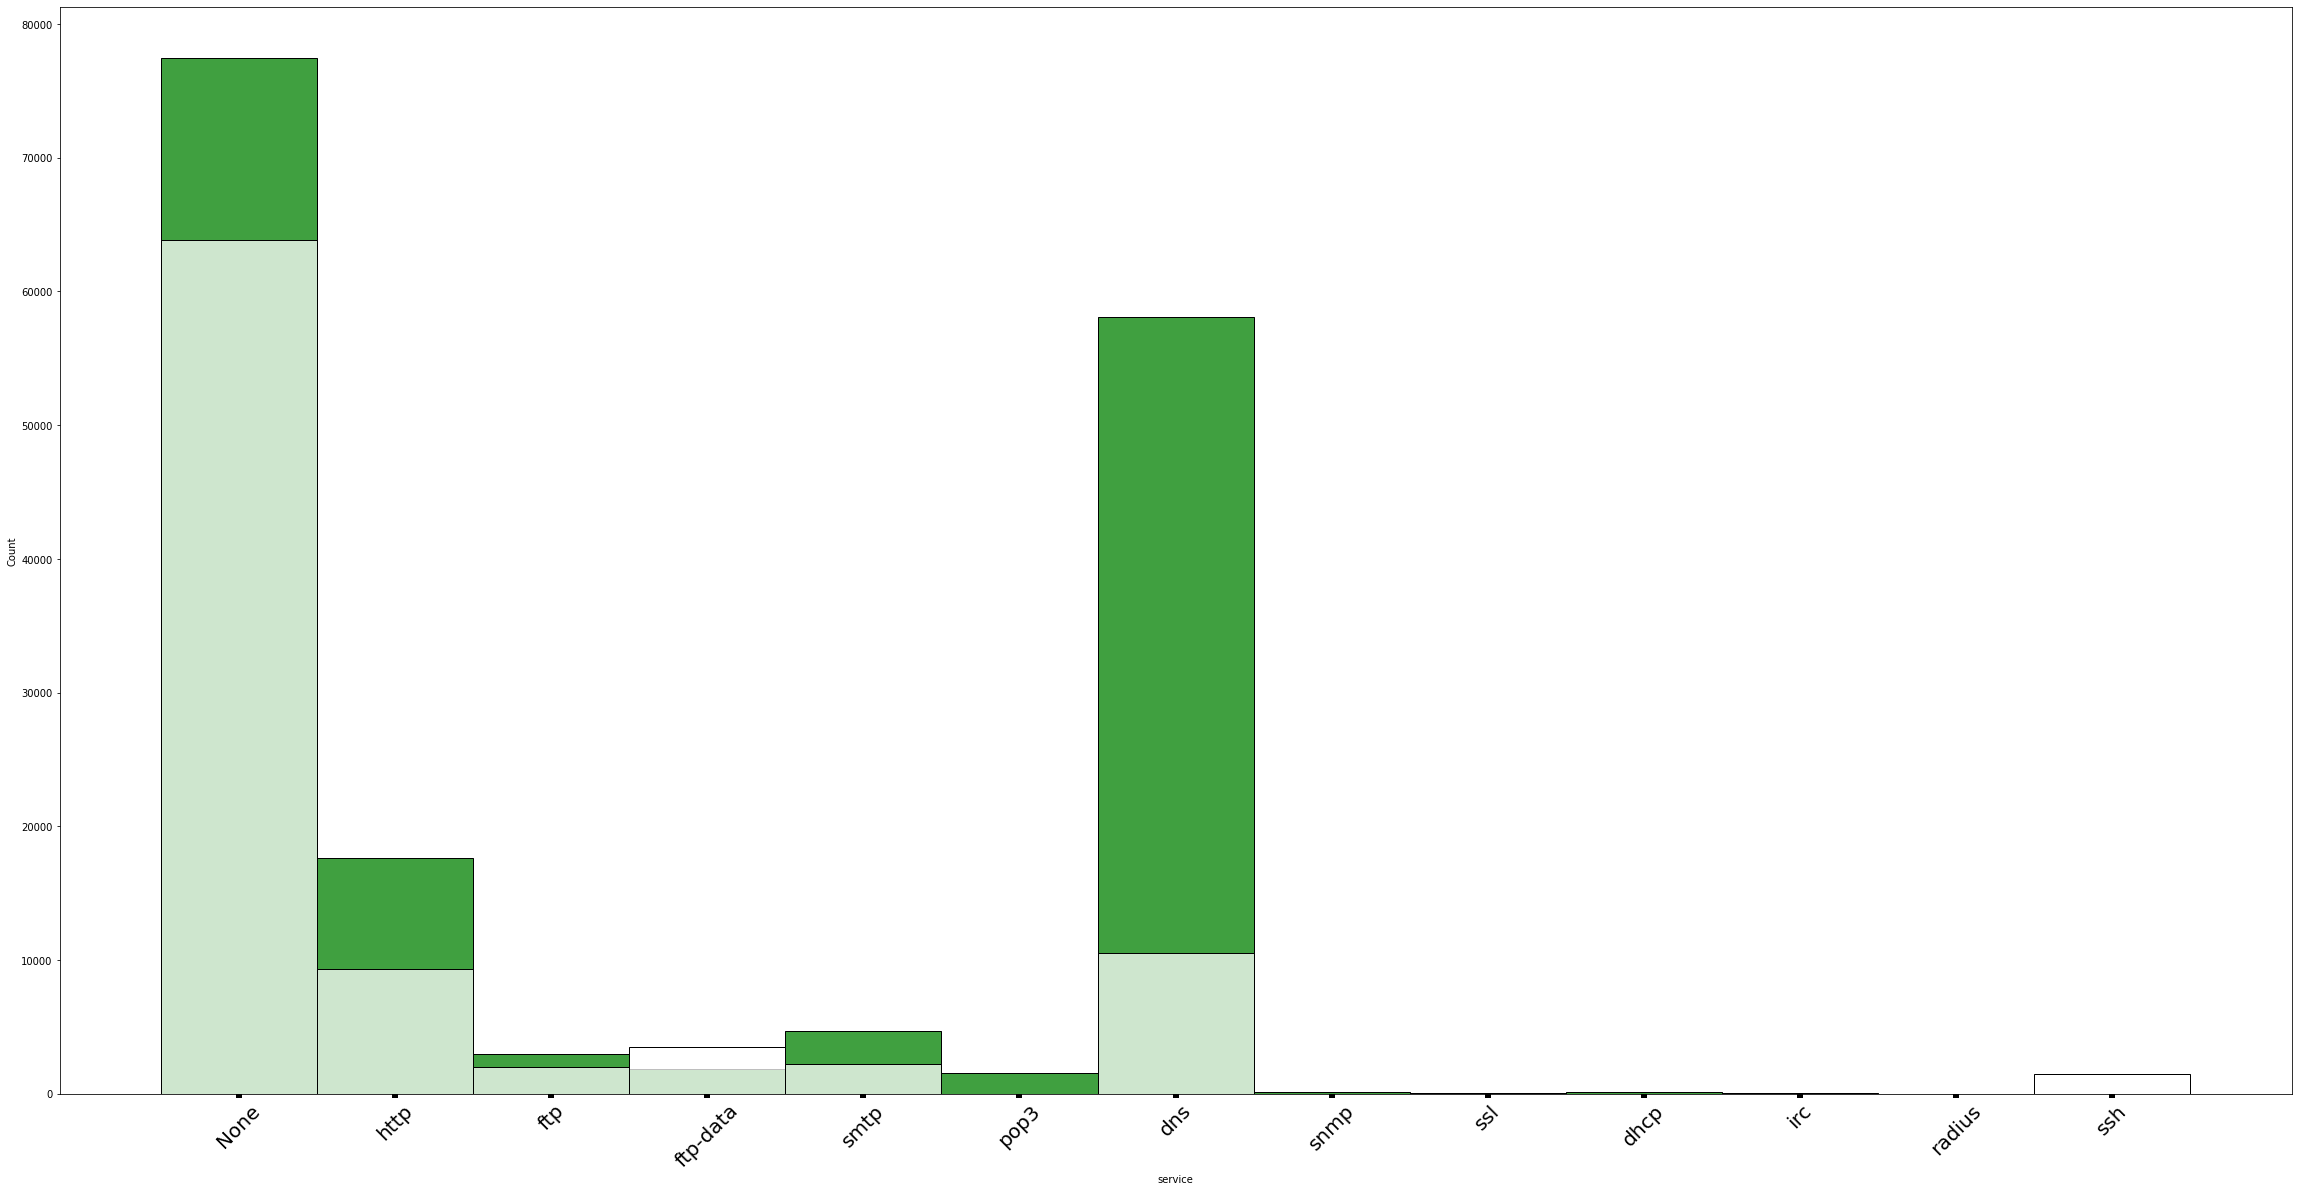

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots( figsize=(40, 20))
sns.histplot(data[data['label'] == 1]['service'], color='green')
sns.histplot(data[data['label'] ==0]['service'], color='white')
axes.tick_params('x', labelrotation=45,width=6,labelsize=20)

**most frequent attacks**

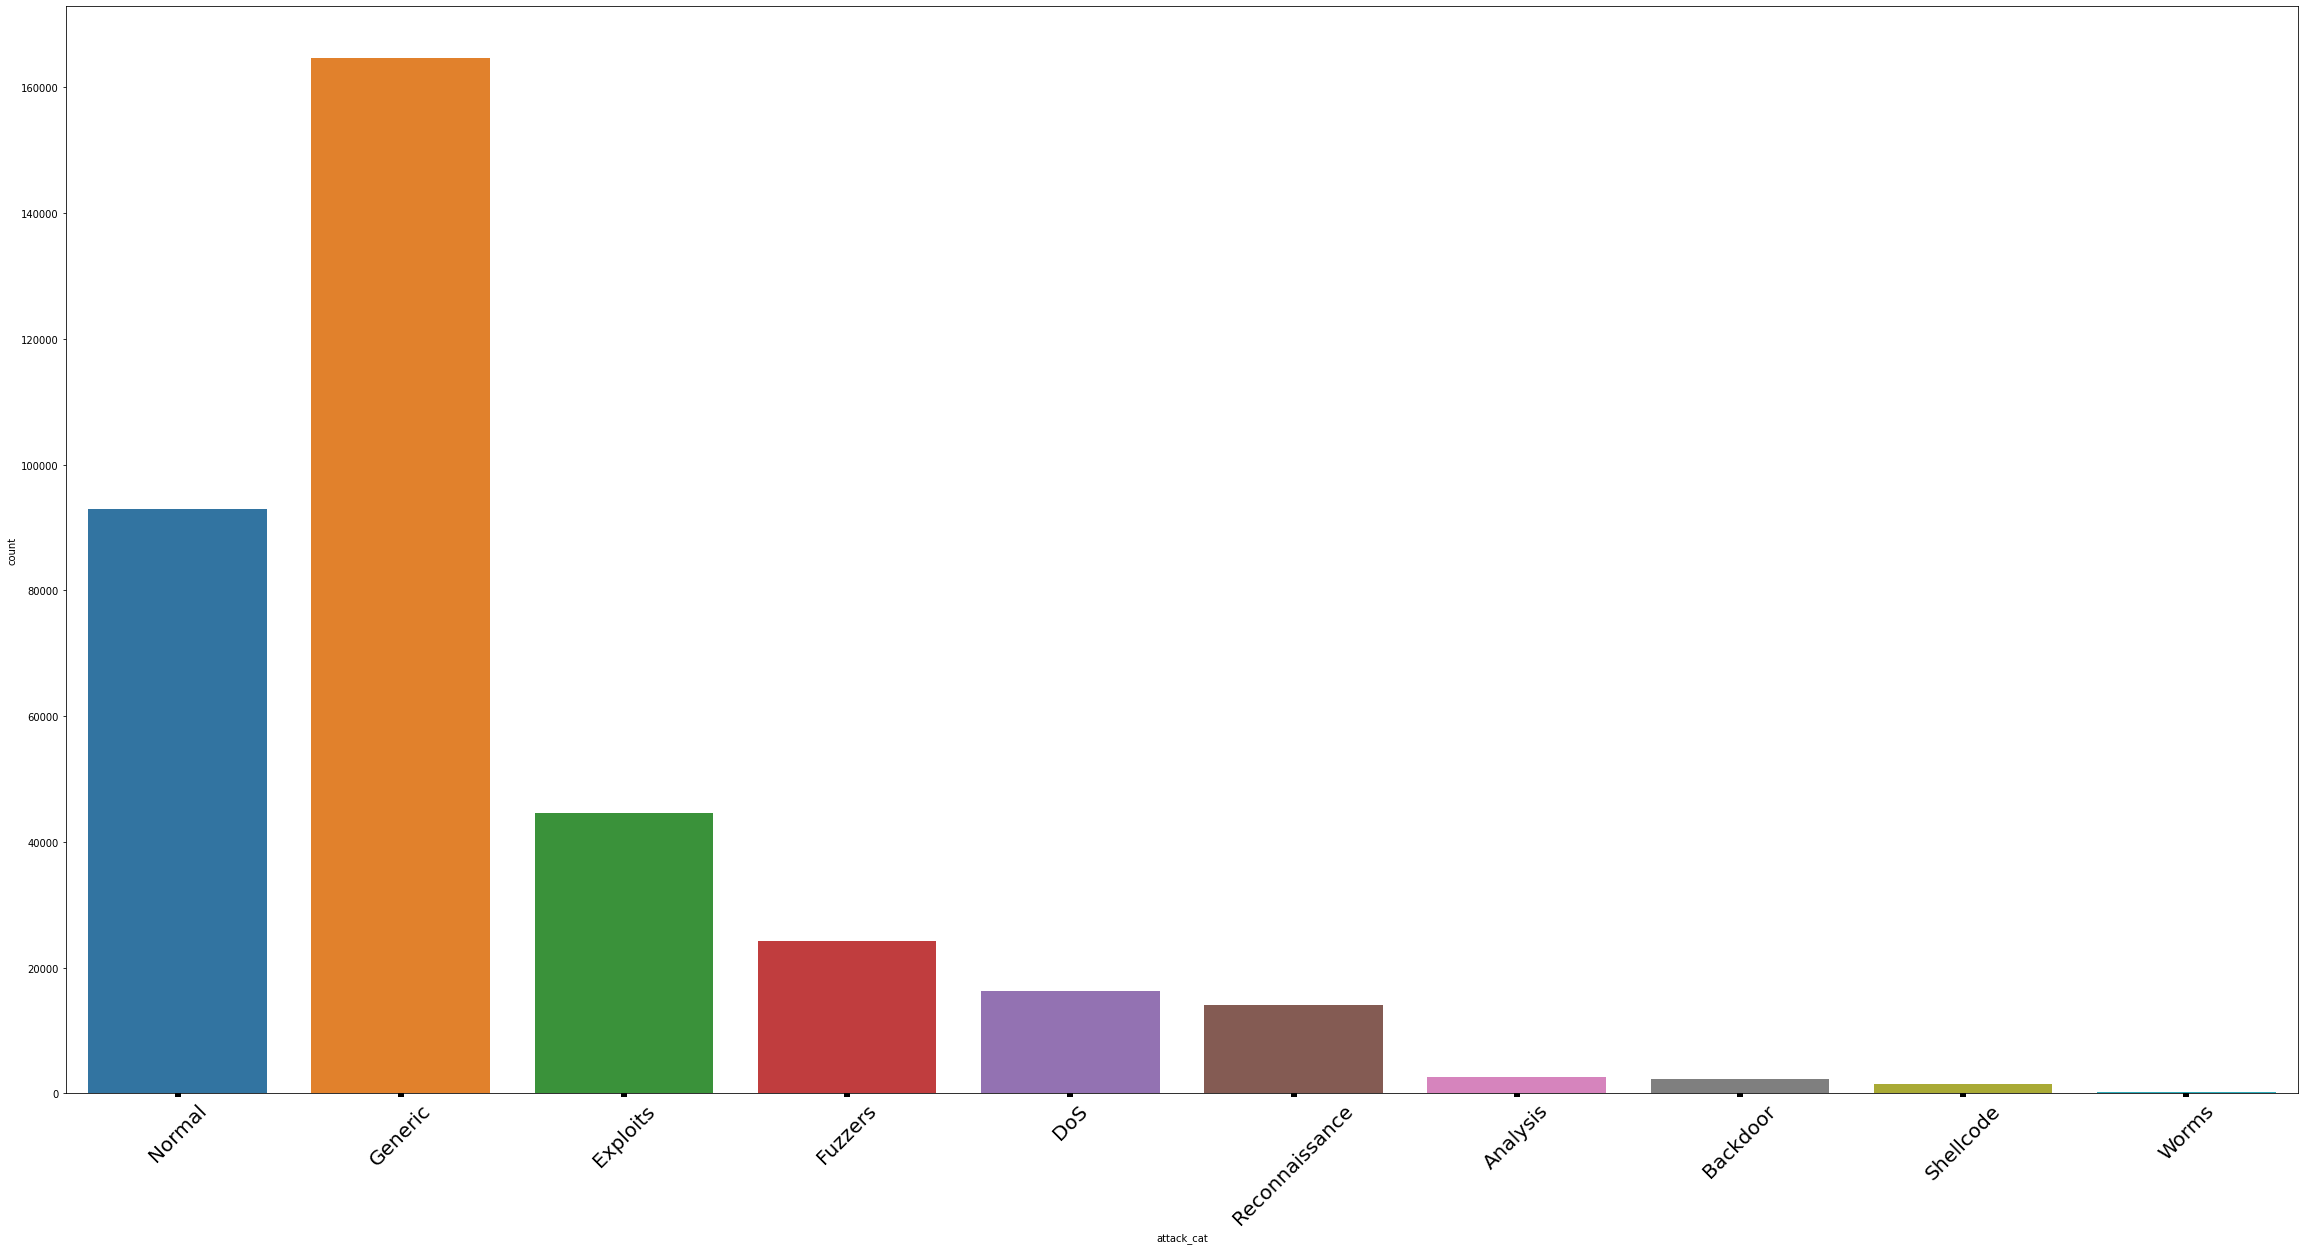

In [ ]:
import seaborn as sns
f, axes = plt.subplots( figsize=(40, 20))
sns.countplot(x="label", data=data)
sns.countplot(x="attack_cat", data=data, order = data['attack_cat'].value_counts().index)
axes.tick_params('x', labelrotation=45,width=6,labelsize=20)

**attacks count for most used protocols**

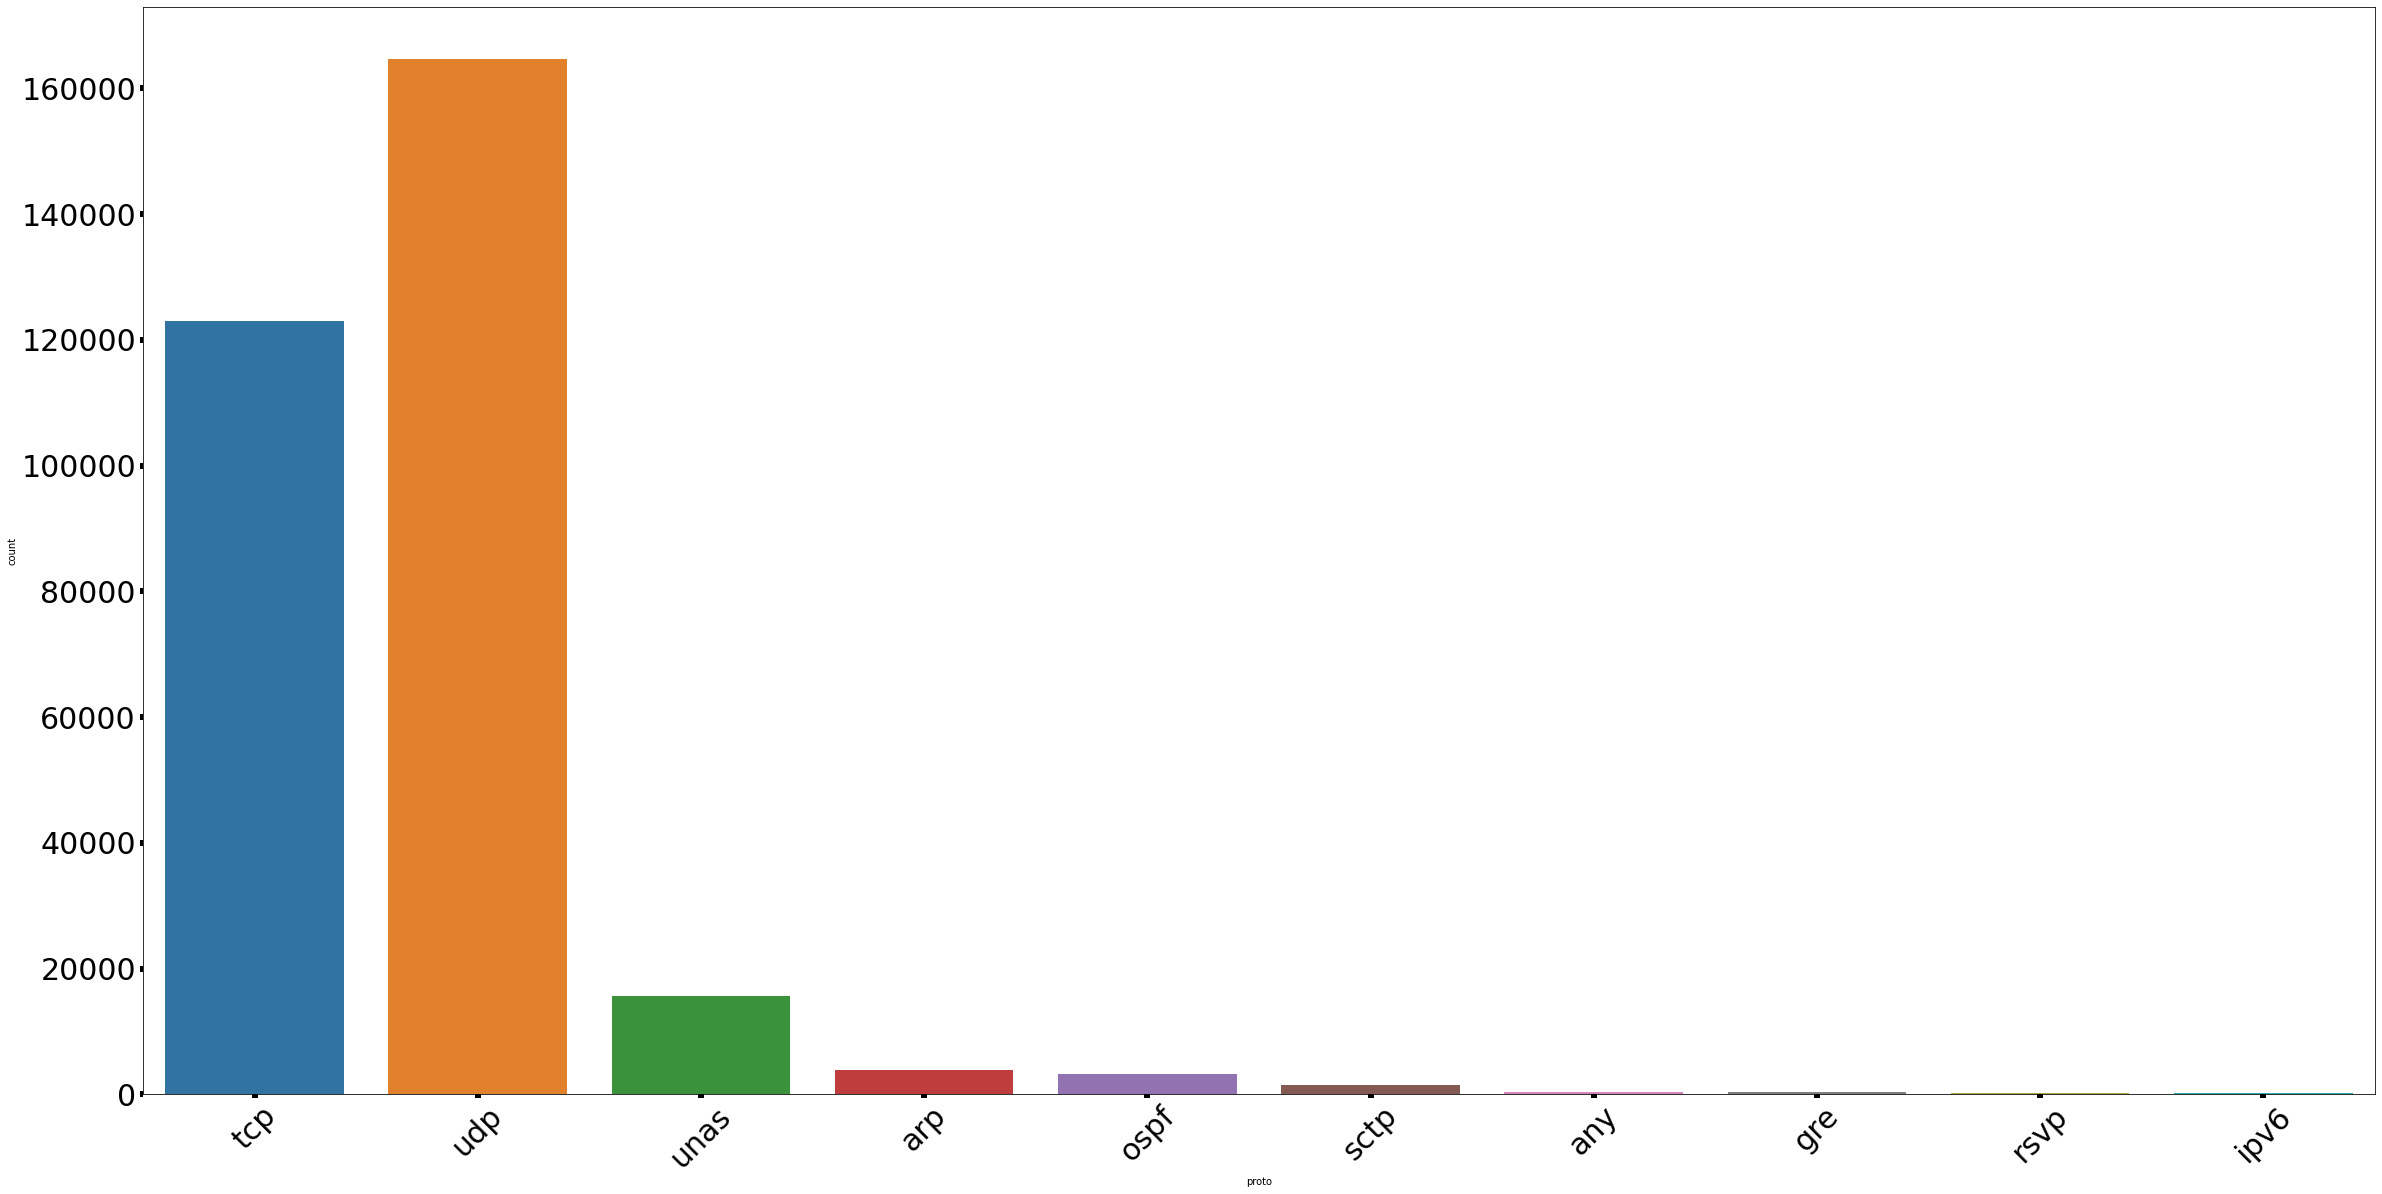

In [ ]:
import seaborn as sns
f, axes = plt.subplots( figsize=(40, 20))
sns.countplot(x="label", data=data)
sns.countplot(x="proto", data=data, order = data['proto'].value_counts()[:10].index)
axes.tick_params('x', labelrotation=45,width=6,labelsize=30)
axes.tick_params('y',width=6,labelsize=30)

In [ ]:
data['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

Now, we see that "label" coloumn and "attack_cat" is kind of similer to each other, so lets investigate this

In [ ]:
data["label"].value_counts()

1    164673
0     93000
Name: label, dtype: int64

In [ ]:
data["attack_cat"].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = data.select_dtypes(include='number').columns.tolist()
s=scaler.fit_transform(data[numerical_features])
data[numerical_features]=s

# **Encoding**

Now, we need to encode all the categorical data because most techniques can't deal with it.

In [ ]:
l1 = data[["proto"]]
l2 = data[["service"]]
l3 = data[["state"]]
l4=data[['attack_cat']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lb_encoder1 =  LabelEncoder()
l1_ = lb_encoder1.fit_transform(l1)

lb_encoder2 =   LabelEncoder()
l2_ = lb_encoder2.fit_transform(l2)

lb_encoder3 = LabelEncoder()
l3_= lb_encoder3.fit_transform(l3)

lb_encoder4 =   LabelEncoder()
l4_= lb_encoder4.fit_transform(l4)

lb_encoder5 =   LabelEncoder()


data["proto"] = l1_
data["service"] = l2_
data["state"] = l3_
data["attack_cat"]=l4_

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lets see the correlation

In [ ]:
crr_loan = data.corr()
crr_loan["attack_cat"].sort_values(ascending=False)

attack_cat           1.000000
dload                0.208868
proto                0.183783
swin                 0.137248
dwin                 0.121688
is_sm_ips_ports      0.096422
stcpb                0.095716
dtcpb                0.094587
ct_srv_src           0.094502
ct_dst_ltm           0.093981
sinpkt               0.091132
ct_srv_dst           0.091042
dmean                0.086860
ct_src_dport_ltm     0.049673
ct_src_ltm           0.049067
ct_dst_src_ltm       0.047498
dpkts                0.023630
ct_dst_sport_ltm     0.022948
dloss                0.016918
dbytes               0.012388
dinpkt               0.012317
response_body_len    0.001522
sjit                -0.000912
djit                -0.003805
spkts               -0.013261
synack              -0.021046
sloss               -0.033507
ct_ftp_cmd          -0.038460
is_ftp_login        -0.038784
tcprtt              -0.040747
sbytes              -0.041092
trans_depth         -0.042492
ackdat              -0.057948
service   

### *Training set represent 70% and testing set represent 30% of the data*

so label shows if the traffic is normal or anomly ,and attack_cat shows if the traffic is normal or anomaly with type of the attack, we can drop the label and use the attack_cat as a target, but we can also use label as a feature(suppose it's an output of another binary classifier)

Now let us split data into training, testing and validation data

---



In [ ]:
from sklearn.model_selection import train_test_split
# set aside 30% of train and test data for evaluation, and again split training data into train and validation sets
target_data=data['attack_cat'].copy()
data=data.drop(['attack_cat'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(data,target_data ,test_size=0.30, shuffle = True, random_state = 43)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 42)

In [ ]:
X_train.shape

(144296, 43)

In [ ]:
target_names = [
    'Normal',
    'Generic',
    'Exploits',
    'Fuzzers',
    'DoS',
    'Reconnaissance',   
    'Analysis',          
    'Backdoor',
    'Shellcode',
    'Worms'
]

### **After we have prepared data, lets compile a model and train it and see the resuls**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model_sgd = keras.models.Sequential()
model_sgd.add(keras.layers.Dense(43, activation="relu",input_dim=43))
model_sgd.add(keras.layers.Dense(30, activation="relu"))  
model_sgd.add(keras.layers.Dense(20, activation="softmax"))


In [ ]:
from keras.optimizers import SGD
model_sgd.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_sgd.layers

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_sgd', monitor='val_loss', save_best_only=True)]
history = model_sgd.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/30
4510/4510 [==============================] - 18s 4ms/step - loss: 1.3362 - accuracy: 0.5442 - val_loss: 1.0648 - val_accuracy: 0.5846
Epoch 2/30
4510/4510 [==============================] - 9s 2ms/step - loss: 1.0697 - accuracy: 0.6282 - val_loss: 1.6045 - val_accuracy: 0.5350
Epoch 3/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.0102 - accuracy: 0.6524 - val_loss: 0.8002 - val_accuracy: 0.7290
Epoch 4/30
4510/4510 [==============================] - 6s 1ms/step - loss: 0.9405 - accuracy: 0.6821 - val_loss: 0.9372 - val_accuracy: 0.6482
Epoch 5/30
4510/4510 [==============================] - 10s 2ms/step - loss: 0.7789 - accuracy: 0.7271 - val_loss: 0.7361 - val_accuracy: 0.7308
Epoch 6/30
4510/4510 [==============================] - 6s 1ms/step - loss: 0.7464 - accuracy: 0.7366 - val_loss: 0.6999 - val_accuracy: 0.7323
Epoch 7/30
4510/4510 [==============================] - 6s 1ms/step - loss: 0.7475 - accuracy: 0.7353 - val_loss: 0.6898 - val_accurac

lets try to change the momentum

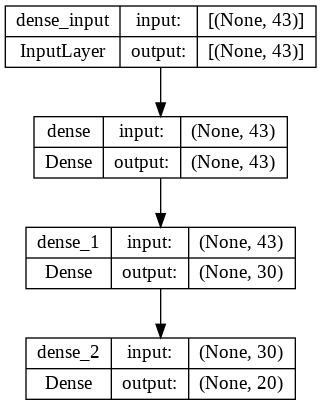

In [ ]:
keras.utils.plot_model(model_sgd, "model1.png", show_shapes=True)

In [ ]:
model_sgd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 43)                1892      
                                                                 
 dense_1 (Dense)             (None, 30)                1320      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
Total params: 3,832
Trainable params: 3,832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

def plot_training_vs_validation(history,model):
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].plot(history.history['accuracy'],'bd--', label = "train_acc")
  ax[0].plot(history.history['val_accuracy'],'rd--', label = "val_acc")
  ax[1].plot(history.history['loss'],'g*--', label = "train_loss")
  ax[1].plot(history.history['val_loss'],'c*--', label = "val_loss")
  ax[0].set_title('Training vs Validation [accuracy]--'+model)
  ax[1].set_title('Training vs Validation [loss]--'+model)
  ax[0].legend()
  ax[1].legend()
  ax[0].set_xlabel('Epochs')
  ax[1].set_xlabel('Epochs')
  ax[0].set_ylabel('Accuracy')
  ax[1].set_ylabel('Loss')
  plt.tight_layout()
  plt.show()


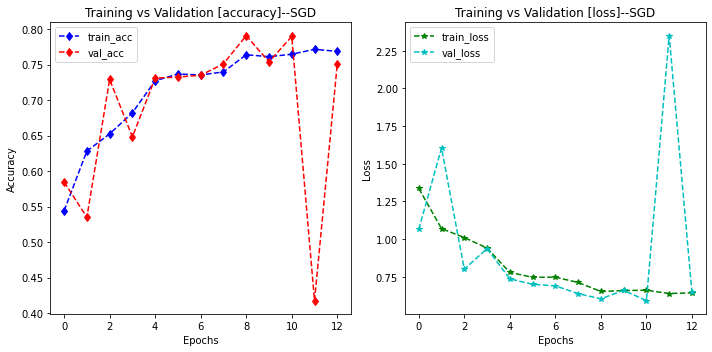

In [ ]:
plot_training_vs_validation(history,"SGD")

In [ ]:
from keras.optimizers import SGD
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_sgd_momentum', monitor='val_loss', save_best_only=True)]
model_sgd1 = keras.models.Sequential()
model_sgd1.add(keras.layers.Dense(42, activation="relu",input_dim=43))
model_sgd1.add(keras.layers.Dense(30, activation="relu"))  
model_sgd1.add(keras.layers.Dense(20, activation="softmax"))
optimizer = keras.optimizers.SGD(momentum=0.9)
model_sgd1.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history_moment_sgd = model_sgd1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.7581 - accuracy: 0.3597 - val_loss: 1.6940 - val_accuracy: 0.3626
Epoch 2/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6980 - accuracy: 0.3602 - val_loss: 1.6888 - val_accuracy: 0.3626
Epoch 3/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6947 - accuracy: 0.3602 - val_loss: 1.6867 - val_accuracy: 0.3626
Epoch 4/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6934 - accuracy: 0.3602 - val_loss: 1.6862 - val_accuracy: 0.3627
Epoch 5/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6925 - accuracy: 0.3604 - val_loss: 1.6849 - val_accuracy: 0.3627
Epoch 6/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6921 - accuracy: 0.3604 - val_loss: 1.6852 - val_accuracy: 0.3628
Epoch 7/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6918 - accuracy: 0.3604 - val_loss: 1.6840 - val_accuracy:

**momentum here did not make the module more effective when learning, in contrast, it made it worse 

so now lets try to change learning rate and momentum togother

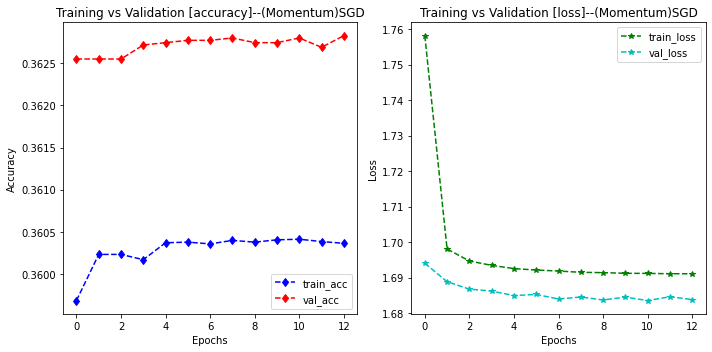

In [ ]:
plot_training_vs_validation(history_moment_sgd,"(Momentum)SGD")

In [ ]:
from keras.optimizers import SGD
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_sgd_momentum_lr', monitor='val_loss', save_best_only=True)]
model_sgd2 = keras.models.Sequential()
model_sgd2.add(keras.layers.Dense(42, activation="relu",input_dim=43))
model_sgd2.add(keras.layers.Dense(30, activation="relu"))  
model_sgd2.add(keras.layers.Dense(20, activation="softmax"))
optimizer = keras.optimizers.SGD(momentum=0.2,learning_rate=0.1)
model_sgd2.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history_moment_lr_sgd = model_sgd2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/30
4510/4510 [==============================] - 7s 1ms/step - loss: 9.4091 - accuracy: 0.3578 - val_loss: 1.7922 - val_accuracy: 0.3626
Epoch 2/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6937 - accuracy: 0.3548 - val_loss: 1.6761 - val_accuracy: 0.3628
Epoch 3/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6802 - accuracy: 0.3583 - val_loss: 1.6721 - val_accuracy: 0.3628
Epoch 4/30
4510/4510 [==============================] - 7s 1ms/step - loss: 1.6793 - accuracy: 0.3595 - val_loss: 1.6717 - val_accuracy: 0.3629
Epoch 5/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6785 - accuracy: 0.3602 - val_loss: 1.6797 - val_accuracy: 0.3631
Epoch 6/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6772 - accuracy: 0.3608 - val_loss: 1.6707 - val_accuracy: 0.3638
Epoch 7/30
4510/4510 [==============================] - 6s 1ms/step - loss: 1.6756 - accuracy: 0.3613 - val_loss: 1.6743 - val_accuracy:

after many trials changing the lr and momentum, its always getting worse than the default values, so why not changing optimizer?

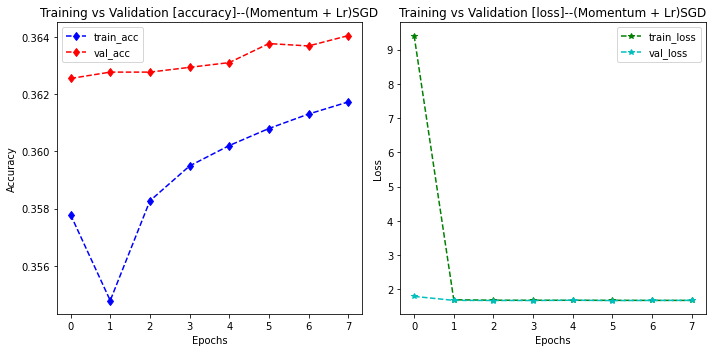

In [ ]:
plot_training_vs_validation(history_moment_lr_sgd,"(Momentum + Lr)SGD")

as many sources states, **adam optimizer is better**, so lets try it.

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_adam', monitor='val_loss', save_best_only=True)]
model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Dense(43, activation="relu"))
model_adam.add(keras.layers.Dense(20, activation="relu"))  
model_adam.add(keras.layers.Dense(10, activation="softmax"))
model_adam.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
historyrelu = model_adam.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.6404 - accuracy: 0.7867 - val_loss: 0.4887 - val_accuracy: 0.8186
Epoch 2/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4844 - accuracy: 0.8231 - val_loss: 0.5224 - val_accuracy: 0.7983
Epoch 3/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4671 - accuracy: 0.8316 - val_loss: 0.4408 - val_accuracy: 0.8472
Epoch 4/50
4510/4510 [==============================] - 7s 1ms/step - loss: 0.4504 - accuracy: 0.8363 - val_loss: 0.4270 - val_accuracy: 0.8495
Epoch 5/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4393 - accuracy: 0.8403 - val_loss: 0.4207 - val_accuracy: 0.8469
Epoch 6/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4297 - accuracy: 0.8426 - val_loss: 0.4138 - val_accuracy: 0.8487
Epoch 7/50
4510/4510 [==============================] - 7s 1ms/step - loss: 0.4215 - accuracy: 0.8456 - val_loss: 0.4156 - val_accuracy:

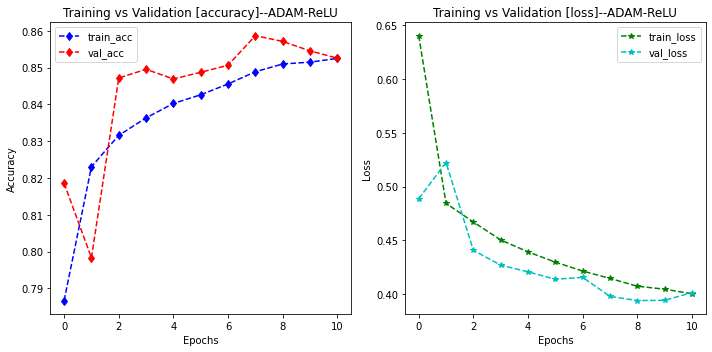

In [ ]:
plot_training_vs_validation(historyrelu,"ADAM-ReLU")

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(autosize=False,width=1000,height=600,)

fig.add_trace(
    go.Scatter( y=historyrelu.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=historyrelu.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=historyrelu.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=historyrelu.history['accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Loss/Accuracy of ReLU Adam Model"
)

fig.update_xaxes(title_text="Epoch")

fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = np.argmax(model_adam.predict(X_test),axis=1)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test, y_pred)

2416/2416 [==============================] - 2s 799us/step


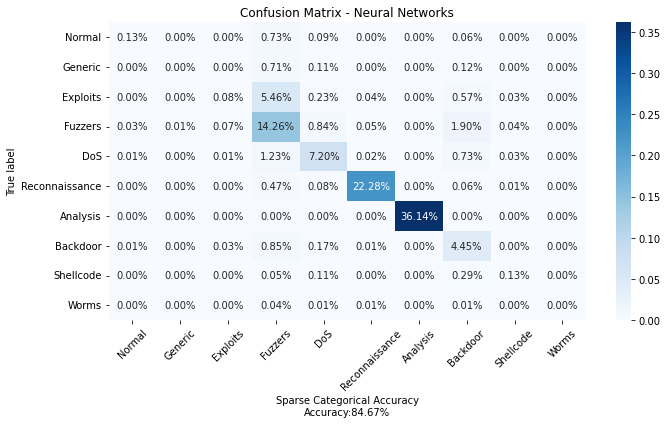

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix - Neural Networks')
ax.set_xlabel(f'Sparse Categorical Accuracy\nAccuracy:{round(acc*100,2)}%')
ax.set_ylabel('True label')

ax.yaxis.set_ticklabels(target_names)
ax.xaxis.set_ticklabels(target_names)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
adamrelu_train_acc=model_adam.evaluate(X_train,y_train)[1]
adamrelu_test_acc=model_adam.evaluate(X_test,y_test)[1]
model_adam.evaluate(X_test,y_test)

2416/2416 [==============================] - 2s 927us/step - loss: 0.4118 - accuracy: 0.8467


[0.4118446409702301, 0.8467310070991516]

we see that the adam optimizer is really better compared to sgd, lets try gridsearch on adam and see the best hyperparameters for it.

In [ ]:
!pip install keras_tuner
import keras_tuner as kt
from keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_adam_grid', monitor='val_loss', save_best_only=True)]
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
  sampling="log")
  optimizer = hp.Choice("optimizer", values=[ "adam"])
  if optimizer == "adam":
       optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model_grid_adam = keras.Sequential()
  for _ in range(n_hidden):
       model_grid_adam.add(layers.Dense(n_neurons, activation="relu"))
  model_grid_adam.add(layers.Dense(10, activation="softmax"))
  model_grid_adam.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
  metrics=["accuracy"])
  return  model_grid_adam
random_search_tuner = kt.RandomSearch(
build_model, objective="val_accuracy", max_trials=5, overwrite=True,
directory="adam_grid_search", project_name="adam_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
validation_data=(X_val, y_val),callbacks=callbacks)
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

Trial 5 Complete [00h 01m 35s]
val_accuracy: 0.807262659072876

Best val_accuracy So Far: 0.8090090155601501
Total elapsed time: 00h 05m 58s


In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'adam'}

so the grid search didn't find parameters better than what we used at first (0.8591% accuracy, 3 layers with hirarichal structure) so we will use it from now on.

lets now try the sigmoid activation function

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_sigmoid', monitor='val_loss', save_best_only=True)]
model_adam_sig = keras.models.Sequential()
model_adam_sig.add(keras.layers.Dense(43, activation="sigmoid"))
model_adam_sig.add(keras.layers.Dense(20, activation="sigmoid"))  
model_adam_sig.add(keras.layers.Dense(10, activation="softmax"))
model_adam_sig.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
historysig = model_adam_sig.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.6711 - accuracy: 0.7662 - val_loss: 0.5050 - val_accuracy: 0.8164
Epoch 2/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4739 - accuracy: 0.8313 - val_loss: 0.4562 - val_accuracy: 0.8359
Epoch 3/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4435 - accuracy: 0.8412 - val_loss: 0.4252 - val_accuracy: 0.8430
Epoch 4/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4279 - accuracy: 0.8460 - val_loss: 0.4135 - val_accuracy: 0.8531
Epoch 5/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4179 - accuracy: 0.8488 - val_loss: 0.4059 - val_accuracy: 0.8517
Epoch 6/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4103 - accuracy: 0.8510 - val_loss: 0.3935 - val_accuracy: 0.8562
Epoch 7/50
4510/4510 [==============================] - 7s 2ms/step - loss: 0.4044 - accuracy: 0.8523 - val_loss: 0.3900 - val_accuracy:

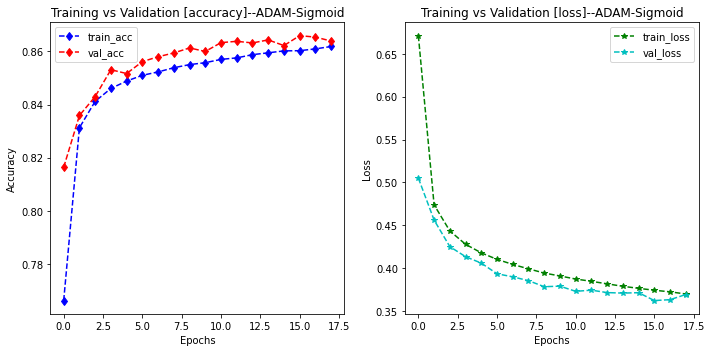

In [ ]:
plot_training_vs_validation(historysig,"ADAM-Sigmoid")

**A notice**

the Sigmoid function does learn more rapidly than any other functions we used before.

In [ ]:
from itertools import count
from sklearn.metrics import accuracy_score
model_adam_sig_train=model_adam_sig.evaluate(X_train,y_train)[1]
w=model_adam_sig.evaluate(X_test,y_test)
model_adam_sig_acc=w[1]
w

2416/2416 [==============================] - 2s 970us/step - loss: 0.3792 - accuracy: 0.8605


[0.37919169664382935, 0.8605210781097412]

using of the sigmoid function did increase the accuracy effectively,

Now lets try to use a fuctional API

In [ ]:
X_train.shape

(144296, 43)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_funcAPI', monitor='val_loss', save_best_only=True)]
input_A = keras.layers.Input(shape=[18], name="wide_input")
input_B = keras.layers.Input(shape=[25], name="deep_input")
hidden1 = keras.layers.Dense(24, activation="relu")(input_B)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, name="output")(concat)
model_funcAPI = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
X_train_A, X_train_B = X_train.iloc[:, :18], X_train.iloc[:, 18:]
X_valid_A, X_valid_B = X_val.iloc[:, :18], X_val.iloc[:, 18:]
X_test_A, X_test_B = X_test.iloc[:, :18], X_test.iloc[:, 18:]
model_funcAPI.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history_funcAPI = model_funcAPI.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_val),callbacks=callbacks)

Epoch 1/20
4510/4510 [==============================] - 9s 2ms/step - loss: 11.9304 - accuracy: 0.1541 - val_loss: 11.7994 - val_accuracy: 0.1703
Epoch 2/20
4510/4510 [==============================] - 7s 1ms/step - loss: 11.7755 - accuracy: 0.1715 - val_loss: 11.8009 - val_accuracy: 0.1709
Epoch 3/20
4510/4510 [==============================] - 7s 2ms/step - loss: 11.7914 - accuracy: 0.1722 - val_loss: 11.8502 - val_accuracy: 0.1725


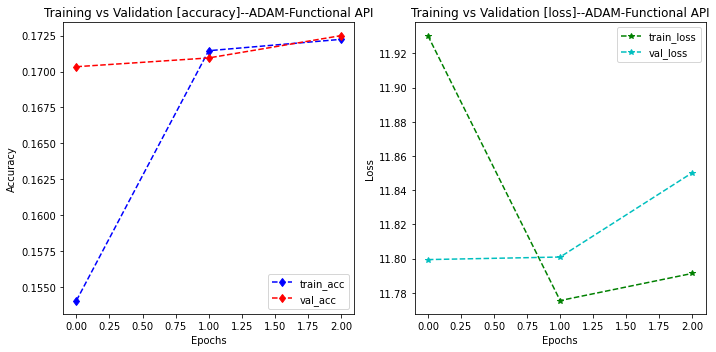

In [ ]:
plot_training_vs_validation(history_funcAPI,"ADAM-Functional API")

we see that it gets better with time but not as much as we want.

*lets try different activation functions*

---



In [ ]:
from keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_tanh', monitor='val_loss', save_best_only=True)]
model_tanh = keras.models.Sequential()
model_tanh.add(keras.layers.Dense(40, activation="tanh"))
model_tanh.add(layers.BatchNormalization())
model_tanh.add(keras.layers.Dense(20, activation="tanh")) 
model_tanh.add(layers.BatchNormalization())
model_tanh.add(keras.layers.Dense(10, activation="softmax"))
model_tanh.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history_tanh = model_tanh.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)


Epoch 1/50
4510/4510 [==============================] - 10s 2ms/step - loss: 0.5751 - accuracy: 0.8000 - val_loss: 0.4704 - val_accuracy: 0.8368
Epoch 2/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4739 - accuracy: 0.8308 - val_loss: 0.4379 - val_accuracy: 0.8501
Epoch 3/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4459 - accuracy: 0.8419 - val_loss: 0.4292 - val_accuracy: 0.8484
Epoch 4/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4284 - accuracy: 0.8464 - val_loss: 0.4435 - val_accuracy: 0.8404
Epoch 5/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4177 - accuracy: 0.8494 - val_loss: 0.4381 - val_accuracy: 0.8434


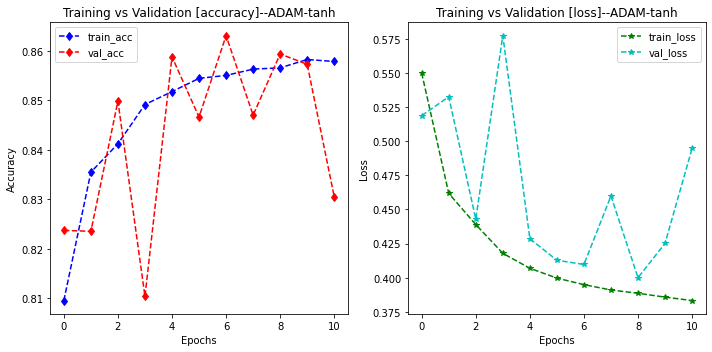

In [ ]:
plot_training_vs_validation(history_tanh,"ADAM-tanh")

In [ ]:
tanh_train_acc=model_tanh.evaluate(X_train,y_train)[1]
tanh_test_acc=model_tanh.evaluate(X_test,y_test)[1]
model_tanh.evaluate(X_test,y_test)

2416/2416 [==============================] - 3s 1ms/step - loss: 0.4478 - accuracy: 0.8388


[0.4477834701538086, 0.8388140201568604]

In [ ]:
from keras import layers
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_leakyR', monitor='val_loss', save_best_only=True)]
model_leakyR = keras.models.Sequential()
model_leakyR.add(keras.layers.Dense(40, activation="LeakyReLU"))
model_leakyR.add(layers.BatchNormalization())
model_leakyR.add(keras.layers.Dense(20, activation="LeakyReLU")) 
model_leakyR.add(layers.BatchNormalization())
model_leakyR.add(keras.layers.Dense(10, activation="softmax"))
model_leakyR.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
history_leakyR = model_leakyR.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4509/4510 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.8057

4510/4510 [==============================] - 9s 2ms/step - loss: 0.5597 - accuracy: 0.8057 - val_loss: 0.5509 - val_accuracy: 0.7863
Epoch 2/50
4488/4510 [============================>.] - ETA: 0s - loss: 0.4781 - accuracy: 0.8296

4510/4510 [==============================] - 9s 2ms/step - loss: 0.4780 - accuracy: 0.8297 - val_loss: 0.5385 - val_accuracy: 0.7953
Epoch 3/50
4510/4510 [==============================] - ETA: 0s - loss: 0.4637 - accuracy: 0.8337

4510/4510 [==============================] - 9s 2ms/step - loss: 0.4637 - accuracy: 0.8337 - val_loss: 0.4780 - val_accuracy: 0.8278
Epoch 4/50
4509/4510 [============================>.] - ETA: 0s - loss: 0.4580 - accuracy: 0.8354

4510/4510 [==============================] - 8s 2ms/step - loss: 0.4581 - accuracy: 0.8354 - val_loss: 0.4714 - val_accuracy: 0.8287
Epoch 5/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4506 - accuracy: 0.8385 - val_loss: 0.5187 - val_accuracy: 0.8042
Epoch 6/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4462 - accuracy: 0.8392 - val_loss: 0.5202 - val_accuracy: 0.8232


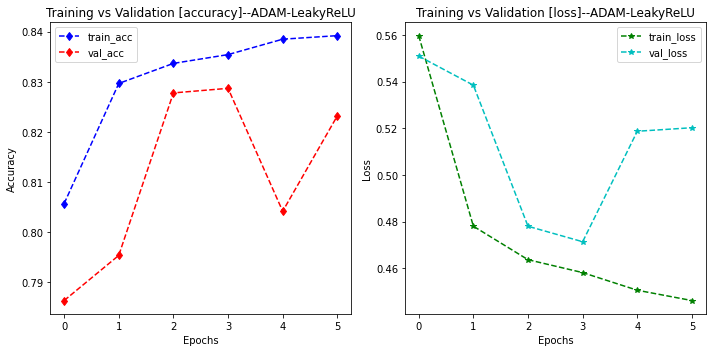

In [ ]:
plot_training_vs_validation(history_leakyR,"ADAM-LeakyReLU")

In [ ]:
lrelu_train_acc=model_leakyR.evaluate(X_train,y_train)[1]
lrelu_test_acc=model_leakyR.evaluate(X_test,y_test)[1]
model_leakyR.evaluate(X_test,y_test)

2416/2416 [==============================] - 3s 1ms/step - loss: 0.5379 - accuracy: 0.8169


[0.5379412174224854, 0.8169128894805908]

In [ ]:
from keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_elu', monitor='val_loss', save_best_only=True)]
model_elu = keras.models.Sequential()
model_elu.add(keras.layers.Dense(40, activation="elu"))
model_elu.add(layers.BatchNormalization())
model_elu.add(keras.layers.Dense(20, activation="elu")) 
model_elu.add(layers.BatchNormalization())
model_elu.add(keras.layers.Dense(10, activation="softmax"))
model_elu.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history_elu = model_elu.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.5599 - accuracy: 0.8042 - val_loss: 0.5263 - val_accuracy: 0.8124
Epoch 2/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4597 - accuracy: 0.8347 - val_loss: 0.4714 - val_accuracy: 0.8378
Epoch 3/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4371 - accuracy: 0.8426 - val_loss: 0.4206 - val_accuracy: 0.8560
Epoch 4/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4201 - accuracy: 0.8484 - val_loss: 0.5372 - val_accuracy: 0.8237
Epoch 5/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4118 - accuracy: 0.8512 - val_loss: 0.4740 - val_accuracy: 0.8461


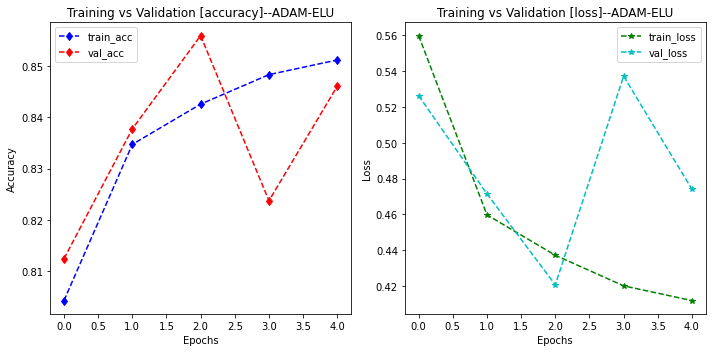

In [ ]:
plot_training_vs_validation(history_elu,"ADAM-ELU")

In [ ]:
elu_train_acc=model_elu.evaluate(X_train,y_train)[1]
elu_test_acc=model_elu.evaluate(X_test,y_test)[1]
model_elu.evaluate(X_test,y_test)

2416/2416 [==============================] - 3s 1ms/step - loss: 0.4794 - accuracy: 0.8395


[0.47941479086875916, 0.8394607901573181]

In [ ]:
from keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_selu', monitor='val_loss', save_best_only=True)]
model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Dense(40, activation="selu"))
model_selu.add(layers.BatchNormalization())
model_selu.add(keras.layers.Dense(20, activation="selu")) 
model_selu.add(layers.BatchNormalization())
model_selu.add(keras.layers.Dense(10, activation="softmax"))
model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history_selu = model_selu.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4510/4510 [==============================] - 10s 2ms/step - loss: 0.5651 - accuracy: 0.8011 - val_loss: 0.5775 - val_accuracy: 0.7899
Epoch 2/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4758 - accuracy: 0.8296 - val_loss: 0.4696 - val_accuracy: 0.8380
Epoch 3/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4536 - accuracy: 0.8377 - val_loss: 0.5938 - val_accuracy: 0.8100
Epoch 4/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4345 - accuracy: 0.8444 - val_loss: 0.5034 - val_accuracy: 0.8162


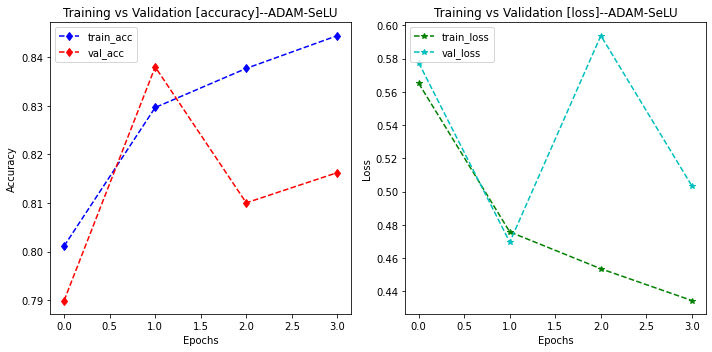

In [ ]:
plot_training_vs_validation(history_selu,"ADAM-SeLU")

In [ ]:
selu_train_acc=model_selu.evaluate(X_train,y_train)[1]
selu_test_acc=model_selu.evaluate(X_test,y_test)[1]
model_selu.evaluate(X_test,y_test)

2416/2416 [==============================] - 3s 1ms/step - loss: 0.5090 - accuracy: 0.8112


[0.5089930891990662, 0.8112209439277649]

In [ ]:
from keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_gelu', monitor='val_loss', save_best_only=True)]
model_gelu = keras.models.Sequential()
model_gelu.add(keras.layers.Dense(40, activation="gelu"))
model_gelu.add(layers.BatchNormalization())
model_gelu.add(keras.layers.Dense(20, activation="gelu")) 
model_gelu.add(layers.BatchNormalization())
model_gelu.add(keras.layers.Dense(10, activation="softmax"))
model_gelu.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history_gelu = model_gelu.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4510/4510 [==============================] - 10s 2ms/step - loss: 0.5679 - accuracy: 0.8031 - val_loss: 0.5906 - val_accuracy: 0.7963
Epoch 2/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4718 - accuracy: 0.8312 - val_loss: 0.5068 - val_accuracy: 0.8134
Epoch 3/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4482 - accuracy: 0.8389 - val_loss: 0.5357 - val_accuracy: 0.8425
Epoch 4/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4299 - accuracy: 0.8456 - val_loss: 0.5317 - val_accuracy: 0.8285


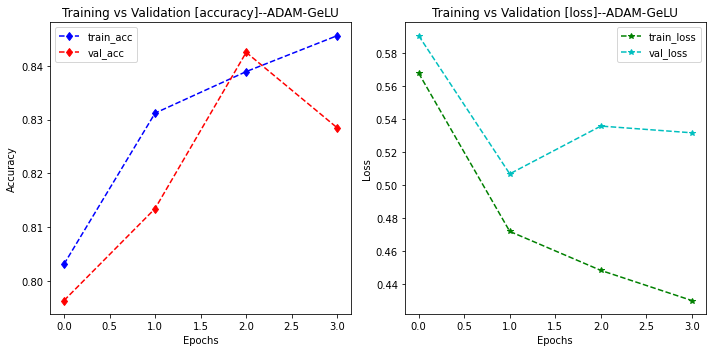

In [ ]:
plot_training_vs_validation(history_gelu,"ADAM-GeLU")

In [ ]:
gelu_train_acc=model_gelu.evaluate(X_train,y_train)[1]
gelu_test_acc=model_gelu.evaluate(X_test,y_test)[1]
model_gelu.evaluate(X_test,y_test)

2416/2416 [==============================] - 3s 1ms/step - loss: 0.5198 - accuracy: 0.8253


[0.5198013186454773, 0.8253344297409058]

In [ ]:
from keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_swish', monitor='val_loss', save_best_only=True)]
model_swish = keras.models.Sequential()
model_swish.add(keras.layers.Dense(40, activation="swish"))
model_swish.add(layers.BatchNormalization())
model_swish.add(keras.layers.Dense(20, activation="swish")) 
model_swish.add(layers.BatchNormalization())
model_swish.add(keras.layers.Dense(10, activation="softmax"))
model_swish.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history_swish = model_swish.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/50
4510/4510 [==============================] - 10s 2ms/step - loss: 0.5519 - accuracy: 0.8080 - val_loss: 0.5560 - val_accuracy: 0.8080
Epoch 2/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4381 - accuracy: 0.8430 - val_loss: 0.4689 - val_accuracy: 0.8373
Epoch 3/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4170 - accuracy: 0.8496 - val_loss: 0.4671 - val_accuracy: 0.8398
Epoch 4/50
4510/4510 [==============================] - 9s 2ms/step - loss: 0.4075 - accuracy: 0.8522 - val_loss: 0.4161 - val_accuracy: 0.8618
Epoch 5/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.4014 - accuracy: 0.8538 - val_loss: 0.4258 - val_accuracy: 0.8581
Epoch 6/50
4510/4510 [==============================] - 8s 2ms/step - loss: 0.3970 - accuracy: 0.8551 - val_loss: 0.4512 - val_accuracy: 0.8579


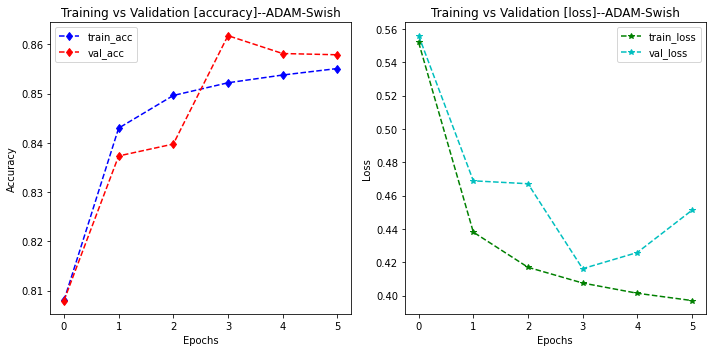

In [ ]:
plot_training_vs_validation(history_swish,"ADAM-Swish")

In [ ]:
swish_train_acc=model_swish.evaluate(X_train,y_train)[1]
swish_test_acc=model_swish.evaluate(X_test,y_test)[1]
model_swish.evaluate(X_test,y_test)

2416/2416 [==============================] - 3s 1ms/step - loss: 0.4574 - accuracy: 0.8547


[0.4573891758918762, 0.8547255992889404]

### plotting all optmizers accuracies togother


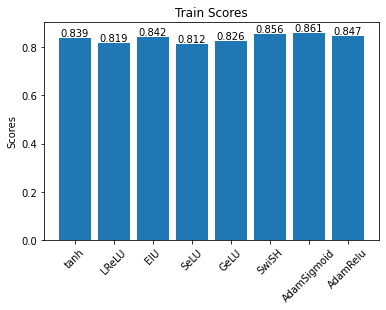

In [ ]:
import matplotlib
train_score=[tanh_train_acc,lrelu_train_acc,elu_train_acc
             ,selu_train_acc,gelu_train_acc,swish_train_acc
             ,model_adam_sig_train,adamrelu_train_acc]

train_score= [round(item, 3) for item in train_score]

#testing scores
test_score = [tanh_test_acc,lrelu_test_acc,elu_test_acc
             ,selu_test_acc,gelu_test_acc,swish_test_acc
             ,model_adam_sig_acc,adamrelu_test_acc]

test_score= [round(item, 3) for item in test_score]

label_p1 = ["tanh","LReLU","ElU","SeLU","GeLU","SwiSH","AdamSigmoid","AdamRelu"]

fig, ax = plt.subplots()
ax.bar(label_p1, train_score, label='Train')
ax.set_ylabel('Scores')
plt.xticks(rotation=45)
ax.set_title('Train Scores')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

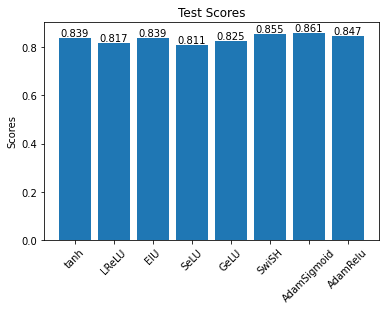

In [ ]:
fig, ax = plt.subplots()
ax.bar(label_p1, test_score, label='Test')
ax.set_ylabel('Scores')
plt.xticks(rotation=45)
ax.set_title('Test Scores')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

now lets run a test to find the best parameters for sgd,adam optimzier.

In [ ]:
import keras_tuner as kt
from keras import layers
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
  sampling="log")
  optimizer = hp.Choice("optimizer", values=[ "adam","sgd"])
  if optimizer == "sgd":
       optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  else:
       optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model_grid = keras.Sequential()
  model_grid.add(layers.Flatten())
  for _ in range(n_hidden):
       model_grid.add(layers.Dense(n_neurons, activation="relu"))
  model_grid.add(layers.Dense(10, activation="softmax"))
  model_grid.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
  metrics=["accuracy"])
  return  model_grid
random_search_tuner = kt.RandomSearch(
build_model, objective="val_accuracy", max_trials=5, overwrite=True,
directory="hello world", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
validation_data=(X_val, y_val),callbacks=callbacks)
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

Trial 5 Complete [00h 01m 32s]
val_accuracy: 0.8052113652229309

Best val_accuracy So Far: 0.8628690242767334
Total elapsed time: 00h 07m 18s


In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'adam'}

##LSTM

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
model_lstm = keras.Sequential()
model_lstm.add(LSTM(units=40, activation="relu",return_sequences=True,input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=20, activation="relu"))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=10))
# Compiling the model
model_lstm.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_lstm', monitor='val_loss', save_best_only=True)]
history_lstm = model_lstm.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val),batch_size=30,callbacks=callbacks)

Epoch 1/20
4810/4810 [==============================] - 108s 22ms/step - loss: 2.4602 - accuracy: 0.4936 - val_loss: 1.1784 - val_accuracy: 0.6804
Epoch 2/20
4810/4810 [==============================] - 107s 22ms/step - loss: 1.1505 - accuracy: 0.6813 - val_loss: 1.0044 - val_accuracy: 0.7260
Epoch 3/20
4810/4810 [==============================] - 103s 21ms/step - loss: 1.1813 - accuracy: 0.6496 - val_loss: 1.1708 - val_accuracy: 0.5752
Epoch 4/20
4810/4810 [==============================] - 103s 21ms/step - loss: 1.2474 - accuracy: 0.5666 - val_loss: 1.3707 - val_accuracy: 0.5369


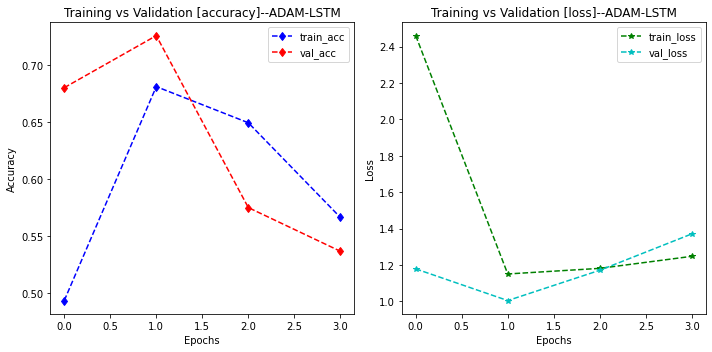

In [ ]:
plot_training_vs_validation(history_lstm,"ADAM-LSTM")